# Parte 2

Aqui foi realizada a análise exploratória dos dados e alterações no conjunto de dados, após as análises. Foi feito o tratamento de outliers, valores errados e informações que não foram consideradas relevantes para o modelo.

Nesta parte, o foco foi o Modelo 1, de previsão de demanda a longo prazo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import plotly.express as px
pd.set_option('display.max_columns', 60)
import warnings
warnings.filterwarnings("ignore")

### Importar o dataframe

In [2]:
df = pd.read_parquet('DadosFinais\df.parquet.gzip', engine='pyarrow')
df.head()

,Data,Demanda,Horário,Dia da Semana,Temperatura,Umidade,Vento,Nebulosidade,valor,Sem ajuste sazonal,Com ajuste sazonal,População,Feriado
0,2006-01-01,2588.0,00:00:00,6,20.925000,90.500000,1.825000,8.750000,108.55,91.702366,98.900273,10530809,Confraternização Universal
1,2006-01-01,2584.0,00:01:00,6,20.927326,90.486111,1.824410,8.747569,108.55,91.702366,98.900273,10530809,Confraternização Universal
2,2006-01-01,2578.0,00:02:00,6,20.929653,90.472222,1.823819,8.745139,108.55,91.702366,98.900273,10530809,Confraternização Universal
3,2006-01-01,2580.0,00:03:00,6,20.931979,90.458333,1.823229,8.742708,108.55,91.702366,98.900273,10530809,Confraternização Universal
4,2006-01-01,2578.0,00:04:00,6,20.934306,90.444444,1.822639,8.740278,108.55,91.702366,98.900273,10530809,Confraternização Universal


Incluir alguns dados de datas

In [3]:
df['Mês'] = df['Data'].dt.month
df['Ano'] = df['Data'].dt.year
df['Mês_nome'] = df['Data'].dt.month_name()
df['Dia_nome'] = df['Data'].dt.day_name()
df.head()

,Data,Demanda,Horário,Dia da Semana,Temperatura,Umidade,Vento,Nebulosidade,valor,Sem ajuste sazonal,Com ajuste sazonal,População,Feriado,Mês,Ano,Mês_nome,Dia_nome
0,2006-01-01,2588.0,00:00:00,6,20.925000,90.500000,1.825000,8.750000,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,January,Sunday
1,2006-01-01,2584.0,00:01:00,6,20.927326,90.486111,1.824410,8.747569,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,January,Sunday
2,2006-01-01,2578.0,00:02:00,6,20.929653,90.472222,1.823819,8.745139,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,January,Sunday
3,2006-01-01,2580.0,00:03:00,6,20.931979,90.458333,1.823229,8.742708,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,January,Sunday
4,2006-01-01,2578.0,00:04:00,6,20.934306,90.444444,1.822639,8.740278,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,January,Sunday


In [4]:
meses = {
'April':'Abril',
'August':'Agosto',
'December':'Dezembro',
'February':'Fevereiro',
'January':'Janeiro',
'July':'Julho',
'June':'Junho',
'March':'Março',
'May':'Maio',
'November':'Novembro',
'October':'Outubro',
'September':'Setembro'
}
df['Mês_nome'] = df['Mês_nome'].map(meses)

In [5]:
dias_semana = {
'Sunday':'Domingo',
'Monday':'Segunda',
'Tuesday':'Terça',
'Wednesday':'Quarta',
'Thursday':'Quinta',
'Friday':'Sexta',
'Saturday':'Sábado'
}
df['Dia_nome'] = df['Dia_nome'].map(dias_semana)

In [6]:
##Renomear algumas colunas
df = df.rename(columns={"valor": "IAEBR", "Sem ajuste sazonal":"Atividade Industrial Sem Ajuste Sazonal", "Com ajuste sazonal":
                        "Atividade Industrial RS Com Ajuste Sazonal"})


### Verificação e tratamento de outliers e valores errados na Demanda

<AxesSubplot:xlabel='Demanda'>

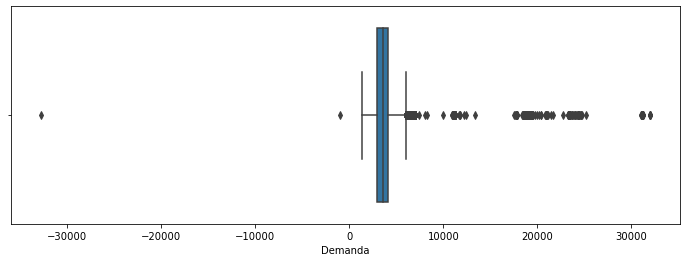

In [10]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df["Demanda"])

É possível verificar que tem valores estranhos, como demandas negativas e extremamente altas. Os valores abaixos de 1500 e acima de 7000 e serão excluídos. Esses são os valores próximos aos históricos de maior e menor demanda no RS nos últimos anos.

In [11]:
df_cleaned = df[(df['Demanda']>1400) & (df['Demanda']<7000)]

<AxesSubplot:xlabel='Demanda'>

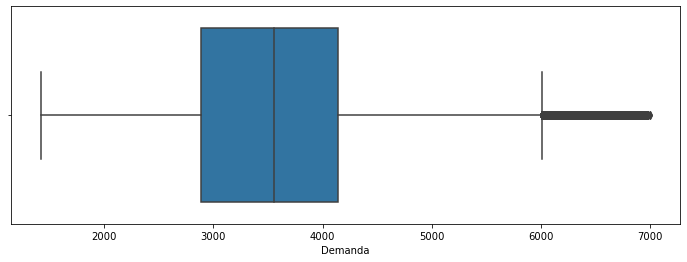

In [13]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df_cleaned["Demanda"])

In [14]:
print('Quantidade de dados excluídos:',len(df)-len(df_cleaned))

Quantidade de dados excluídos: 302


In [15]:
df_cleaned.describe()

,Demanda,Dia da Semana,Temperatura,Umidade,Vento,Nebulosidade,IAEBR,Atividade Industrial Sem Ajuste Sazonal,Atividade Industrial RS Com Ajuste Sazonal,População,Mês,Ano
count,7.703327e+06,7.703327e+06,7.703327e+06,7.703327e+06,7.703327e+06,7.703327e+06,7.703327e+06,7.703327e+06,7.703327e+06,7.703327e+06,7.703327e+06,7.703327e+06
mean,3.543303e+03,3.000488e+00,1.938314e+01,7.665803e+01,5.858184e+00,5.458677e+00,1.350090e+02,1.001999e+02,9.995778e+01,1.100805e+07,6.428493e+00,2.012832e+03
std,8.144954e+02,2.000499e+00,5.541801e+00,1.155167e+01,2.039663e+01,3.127923e+00,9.654704e+00,9.722549e+00,8.721721e+00,2.893271e+05,3.432539e+00,4.231004e+00
min,1.422000e+03,0.000000e+00,8.750000e-01,2.700000e+01,0.000000e+00,0.000000e+00,1.078000e+02,7.114666e+01,7.152513e+01,1.053081e+07,1.000000e+00,2.006000e+03
25%,2.890000e+03,1.000000e+00,1.577530e+01,6.924097e+01,1.452396e+00,2.674306e+00,1.291700e+02,9.281440e+01,9.230118e+01,1.065233e+07,3.000000e+00,2.009000e+03
50%,3.557000e+03,3.000000e+00,1.979299e+01,7.747083e+01,2.091875e+00,5.635417e+00,1.361800e+02,9.996692e+01,1.001199e+02,1.106653e+07,6.000000e+00,2.013000e+03
75%,4.136000e+03,5.000000e+00,2.340472e+01,8.577292e+01,2.840556e+00,8.325347e+00,1.419200e+02,1.080111e+02,1.070208e+02,1.122995e+07,9.000000e+00,2.016000e+03
max,6.995000e+03,6.000000e+00,3.772500e+01,9.875000e+01,4.115520e+02,1.000000e+01,1.521300e+02,1.222433e+02,1.182508e+02,1.142312e+07,1.200000e+01,2.020000e+03


### Análise Exploratória dos Dados

**Boxplot por feriados**

<AxesSubplot:xlabel='Demanda', ylabel='Feriado'>

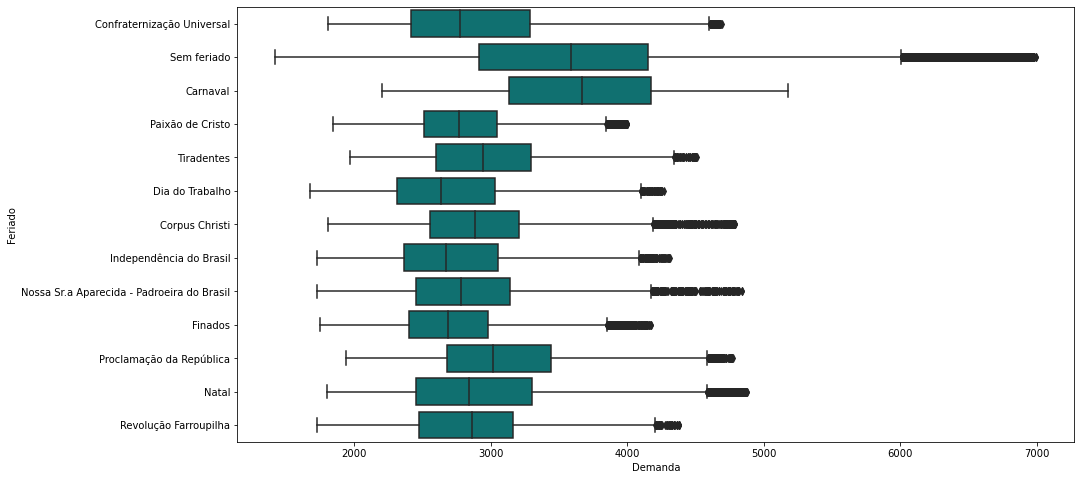

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_cleaned["Demanda"], y= df_cleaned['Feriado'], color = 'teal')

***É possível perceber que a média de demanda nos dias sem feriados é maior do que nos dias com feriados, com exceção do carnaval.*** 

**Boxplot por dia**

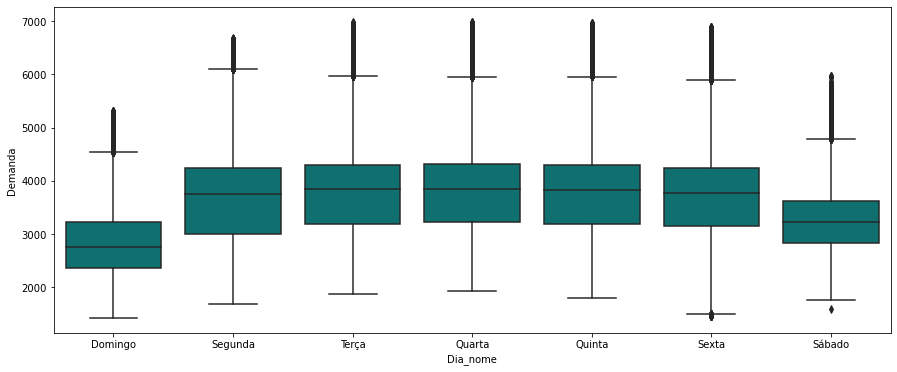

In [17]:
plt.figure(figsize=(15,6))
sns.boxplot(y=df_cleaned["Demanda"], x= df_cleaned['Dia_nome'], color='teal');

***Nos dias de semana a distribuição da demanda é bastante similar e bem diferente do sábado e domingo.***

Incluindo os turnos

In [18]:
df_cleaned.loc[(df_cleaned['Horário'] <= datetime.time(6,0)) & (df_cleaned['Horário'] >= datetime.time(0,0)), 'Turno'] = 'Madrugada'  
df_cleaned.loc[(df_cleaned['Horário'] <= datetime.time(12,0)) & (df_cleaned['Horário'] > datetime.time(6,0)), 'Turno'] = 'Manhã'
df_cleaned.loc[(df_cleaned['Horário'] <= datetime.time(23,59)) & (df_cleaned['Horário'] > datetime.time(18,0)), 'Turno'] = 'Noite'

**Boxplot por turno**

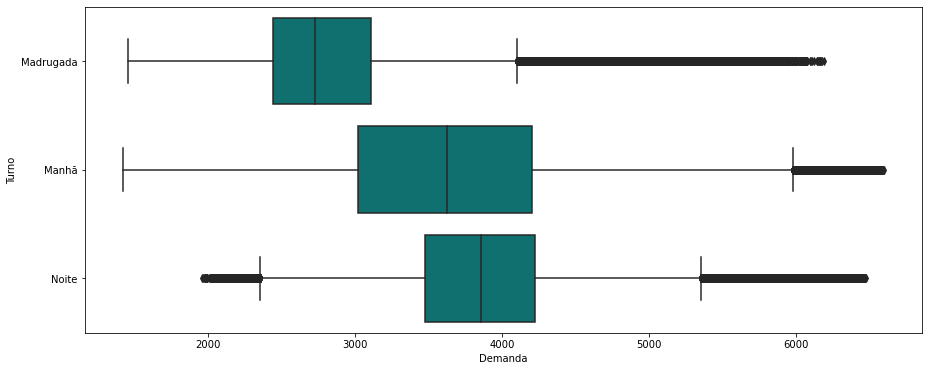

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df_cleaned["Demanda"], y= df_cleaned['Turno'], color='teal');


#### Gráfico Diário

In [25]:
#Foi usado um dia como exemplo
px.line( df_cleaned.loc[df_cleaned['Data']=='2019-01-08'], x="Horário", y="Demanda", title='Demanda Diária')

### Média de demanda por ano

In [26]:
df_grouped_by_year = df_cleaned.groupby('Ano')['Demanda'].agg(['mean','min', 'max']).reset_index() 

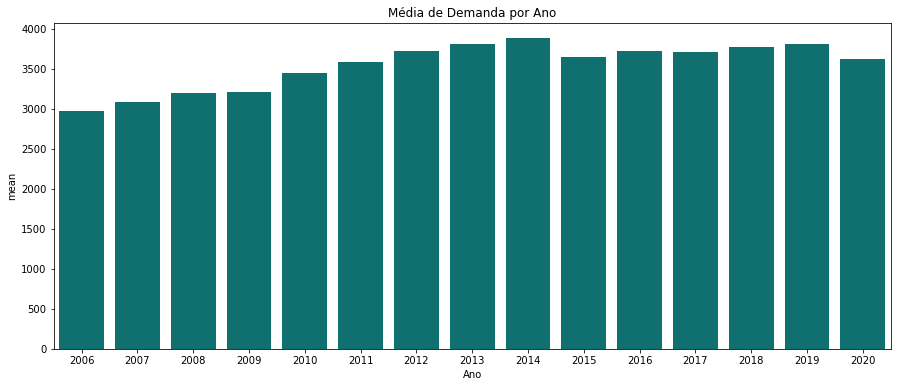

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(x='Ano', y='mean', data=df_grouped_by_year, color='teal')
plt.title('Média de Demanda por Ano')
plt.show();

### Demanda média por mês e Temperatura média por mês

In [28]:
df_grouped_by_month = df_cleaned.groupby('Mês_nome')['Demanda', 'Temperatura'].agg(['mean','min', 'max']).reset_index() 

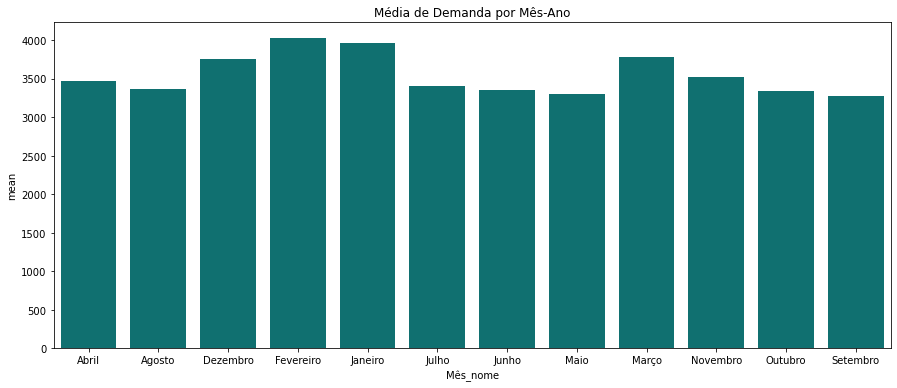

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(x='Mês_nome', y=df_grouped_by_month['Demanda']['mean'], data=df_grouped_by_month, color='teal')
plt.title('Média de Demanda por Mês-Ano')
plt.show();

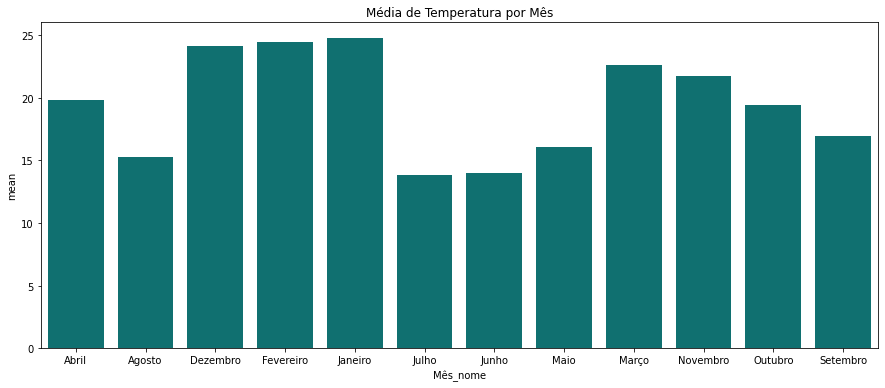

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(x='Mês_nome', y=df_grouped_by_month['Temperatura']['mean'], data=df_grouped_by_month, color='teal')
plt.title('Média de Temperatura por Mês')
plt.show();

***É possível perceber que os meses onde a média de temperatura é maior tem uma média maior de demanda.***

### Média, mínima e máxima por dia

In [31]:
df_grouped_by_date = df_cleaned.groupby('Data')['Demanda'].agg(['mean','min', 'max']).reset_index() 
df_grouped_by_date.head()

,Data,mean,min,max
0,2006-01-01,2277.530556,1806.0,3302.0
1,2006-01-02,3045.465278,2274.0,3631.0
2,2006-01-03,3213.102778,2560.0,3761.0
3,2006-01-04,3256.781944,2549.0,3856.0
4,2006-01-05,3314.315900,2649.0,3910.0


**Gráfico da média diária ao longo do tempo**

<AxesSubplot:xlabel='Data', ylabel='mean'>

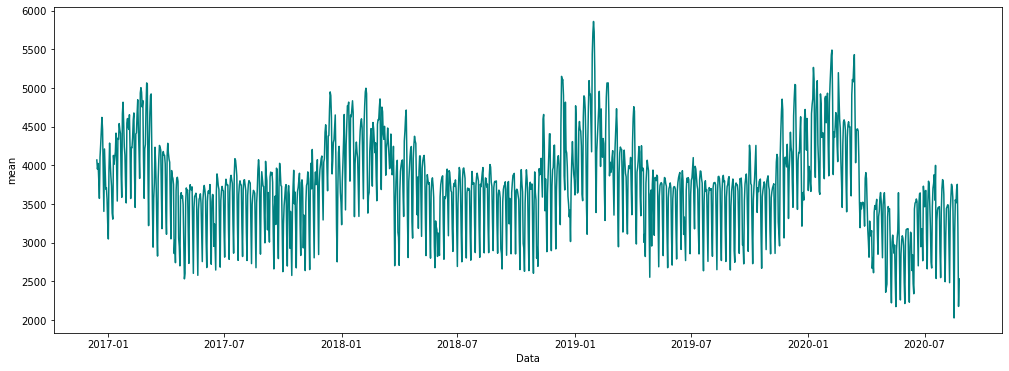

In [32]:
plt.figure(figsize=(17,6))
sns.lineplot(y=df_grouped_by_date['mean'][4000:], x = df_grouped_by_date['Data'][4000:], color='teal')

**Para verificar a correlação, faremos algumas modificações no dataset. Transformar os dados categóricos em"one-hot"**

In [33]:
# Carrega o último dataframe
df = df_cleaned

In [34]:
# Tranformar os feriados para com ou sem feriado
df['Feriado_cod'] = df['Feriado']
df['Feriado_cod'] = df['Feriado_cod'].apply(lambda x: 'Sem Feriado' if x=='Sem feriado' else 'Com Feriado')

In [35]:
# Codificação one-hot para feriados
df = pd.get_dummies(df, columns=['Feriado_cod'], prefix='', drop_first=False, prefix_sep='')

In [36]:
# Tranformar os dias para dia de semana ou fim de semana
df['Categoria_dia'] = df['Dia_nome']
df['Categoria_dia'] = df['Categoria_dia'].apply(lambda x: 'Fim de Semana' if (x=='Sábado' or x=='Domingo') else 'Dia de Semana')

In [37]:
# Codificação one-hot para dias da semana e categorias dias
df = pd.get_dummies(df, columns=['Dia_nome'], prefix='', drop_first=False, prefix_sep='')
df = pd.get_dummies(df, columns=['Categoria_dia'], prefix='', drop_first=False, prefix_sep='')

In [38]:
# Codificação one-hot para os meses
df = pd.get_dummies(df, columns=['Mês_nome'], prefix='', drop_first=False, prefix_sep='')

In [39]:
df.head()

,Data,Demanda,Horário,Dia da Semana,Temperatura,Umidade,Vento,Nebulosidade,IAEBR,Atividade Industrial Sem Ajuste Sazonal,Atividade Industrial RS Com Ajuste Sazonal,População,Feriado,Mês,Ano,Turno,Com Feriado,Sem Feriado,Domingo,Quarta,Quinta,Segunda,Sexta,Sábado,Terça,Dia de Semana,Fim de Semana,Abril,Agosto,Dezembro,Fevereiro,Janeiro,Julho,Junho,Maio,Março,Novembro,Outubro,Setembro
0,2006-01-01,2588.0,00:00:00,6,20.925000,90.500000,1.825000,8.750000,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,Madrugada,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2006-01-01,2584.0,00:01:00,6,20.927326,90.486111,1.824410,8.747569,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,Madrugada,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,2006-01-01,2578.0,00:02:00,6,20.929653,90.472222,1.823819,8.745139,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,Madrugada,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,2006-01-01,2580.0,00:03:00,6,20.931979,90.458333,1.823229,8.742708,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,Madrugada,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,2006-01-01,2578.0,00:04:00,6,20.934306,90.444444,1.822639,8.740278,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,Madrugada,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


## Correlação de todas as variáveis com a demanda

In [40]:
df_cor = df[['Demanda', 'Temperatura', 'Umidade', 'Vento', 'Nebulosidade','IAEBR','Atividade Industrial Sem Ajuste Sazonal',
             'Atividade Industrial RS Com Ajuste Sazonal', 
                 'População', 'Com Feriado', 'Sem Feriado', 'Sábado','Domingo','Dia de Semana','Abril','Agosto', 'Dezembro', 'Fevereiro',
             'Janeiro','Julho', 'Junho', 'Março', 'Maio', 'Novembro', 'Outubro', 'Setembro' ]]

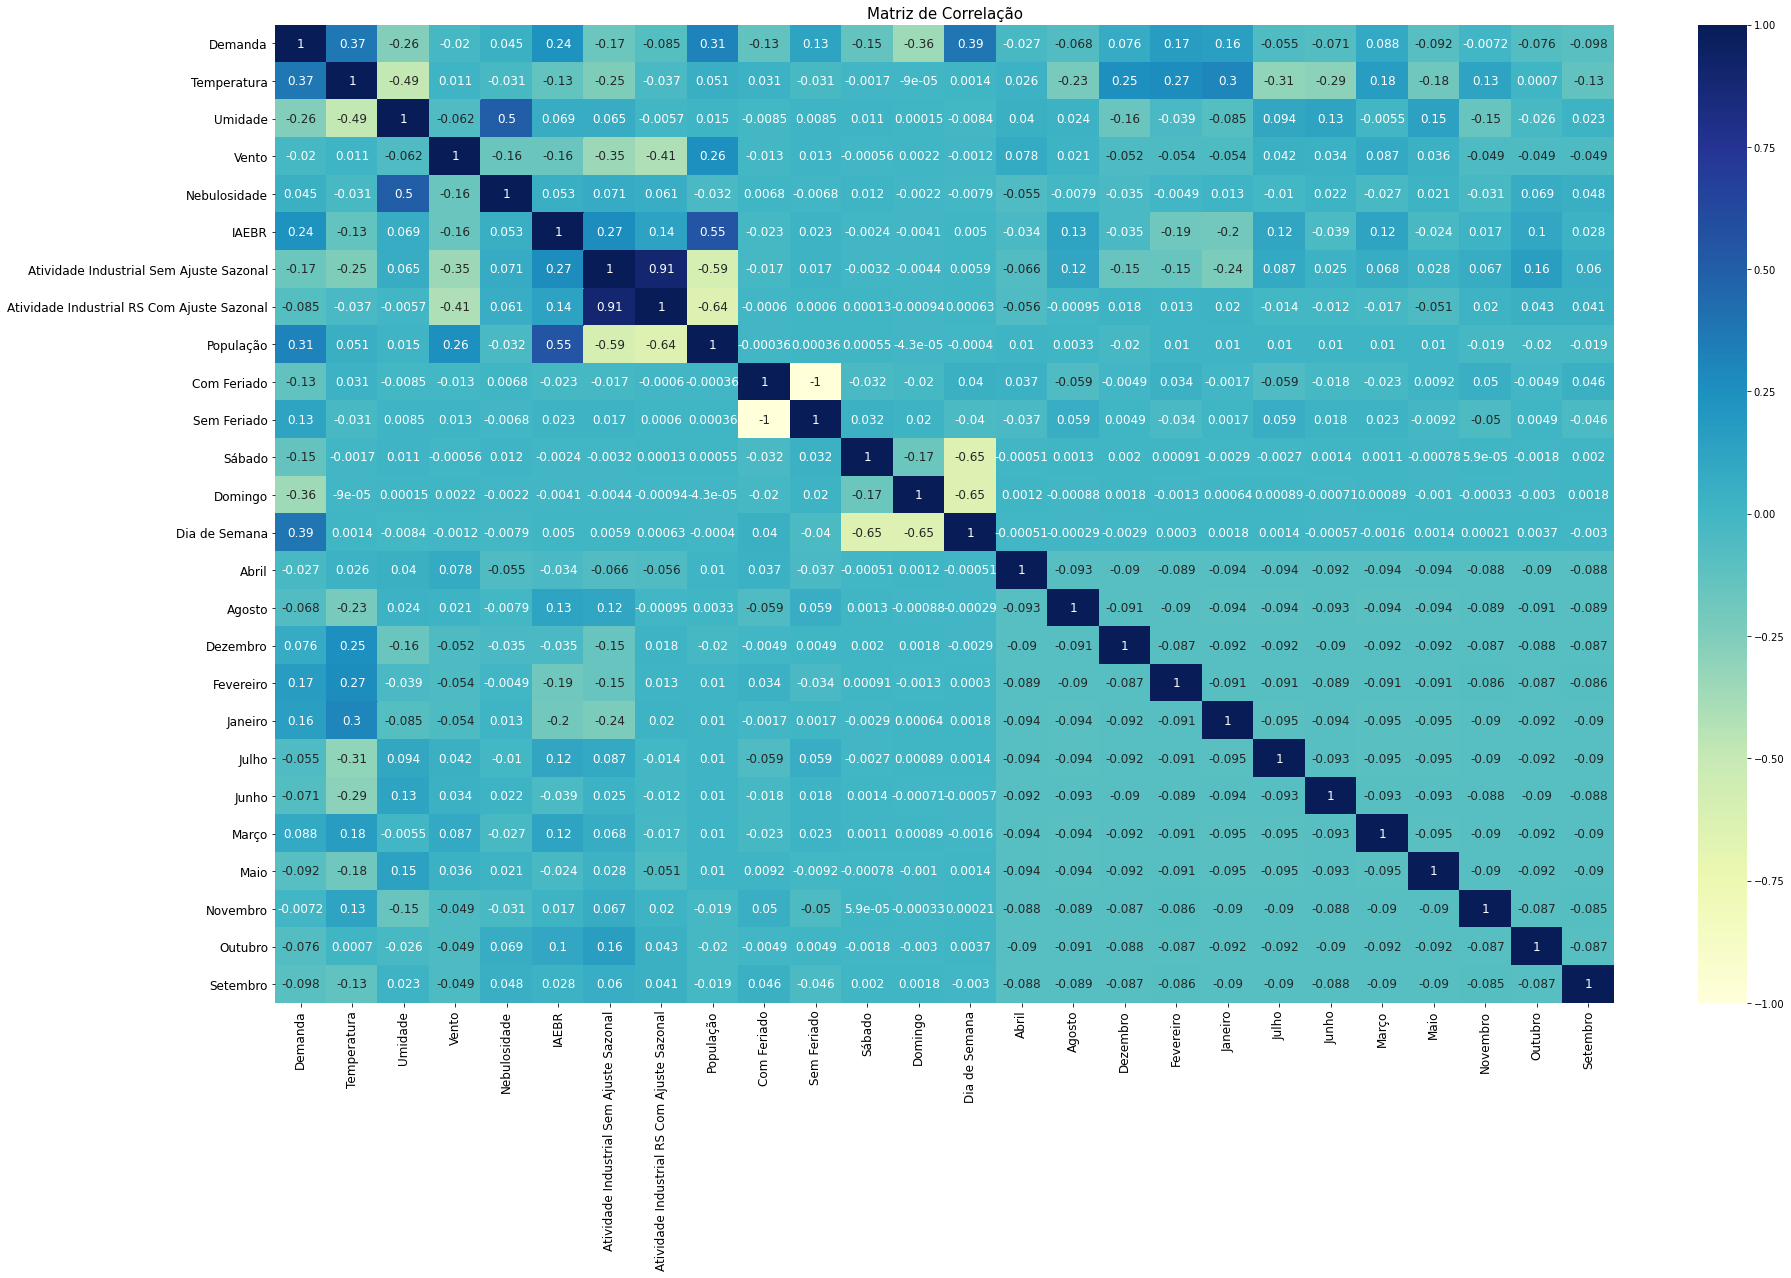

In [41]:
ax = plt.figure(figsize=(30,18));
corr = df_cor.corr()
ax = sns.heatmap(corr, annot=True, cmap="YlGnBu", annot_kws={"size": 12}, fmt='.2g')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.title('Matriz de Correlação', fontsize=15);

### Tirando os dados  que parecem não ter muita correlação com a demanda, ou que possuem alta correlação entre si:


In [42]:
df_2 = df.drop(columns=['Vento', 'Nebulosidade','Atividade Industrial RS Com Ajuste Sazonal', 'Sem Feriado','Fim de Semana', 
                        'Segunda', 'Terça', 'Quarta','Quinta', 'Sexta'])

In [43]:
df_cor_2 = df_2[['Demanda', 'Temperatura', 'Umidade','IAEBR','Atividade Industrial Sem Ajuste Sazonal','População', 
                 'Com Feriado', 'Sábado','Domingo','Dia de Semana','Abril','Agosto', 'Dezembro', 'Fevereiro',
             'Janeiro','Julho', 'Junho', 'Março', 'Maio', 'Novembro', 'Outubro', 'Setembro' ]]

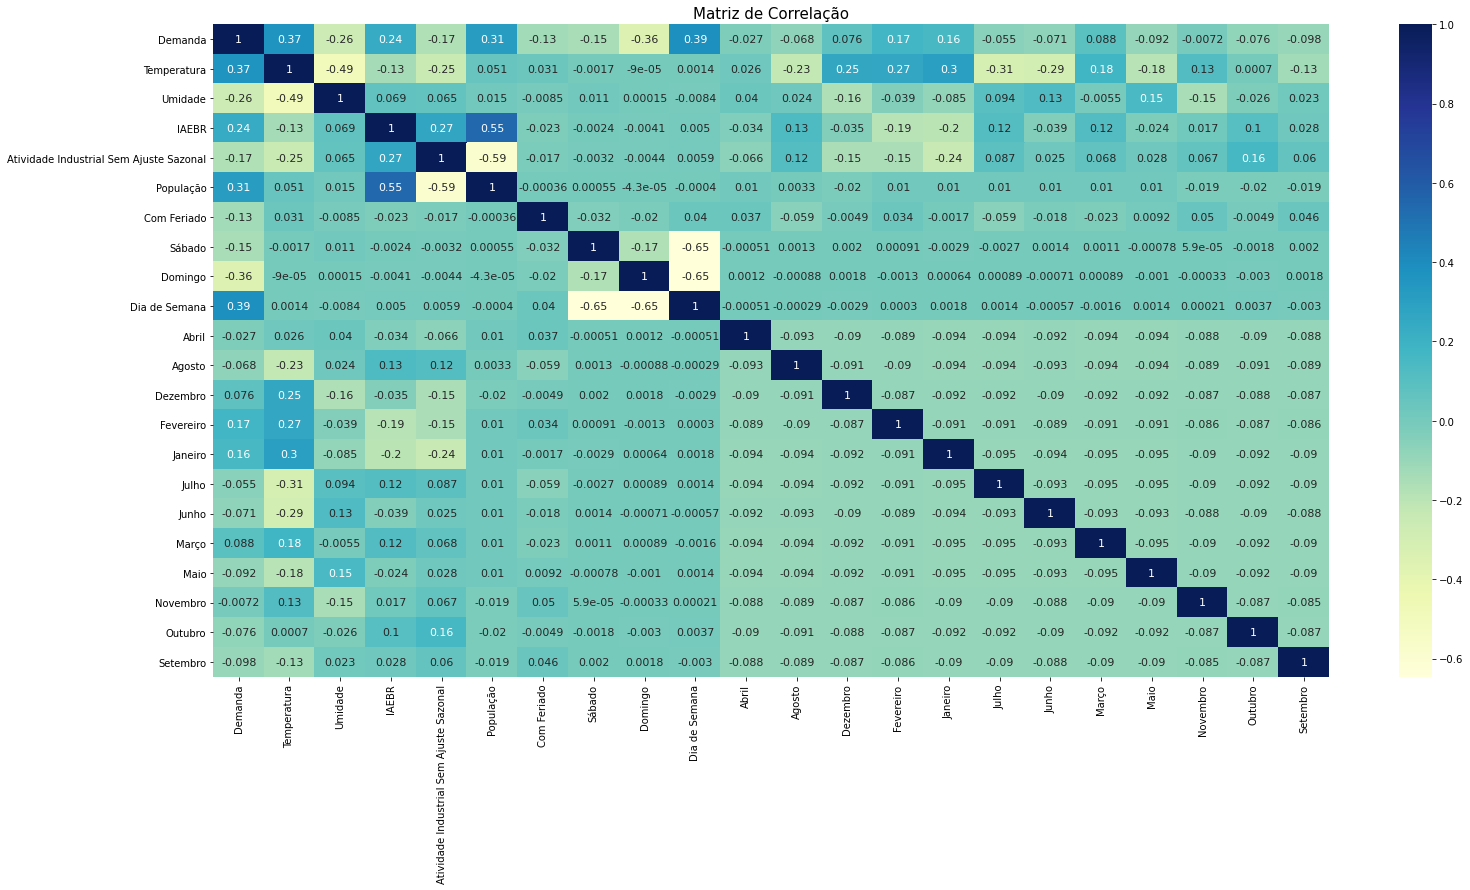

In [44]:
ax = plt.figure(figsize=(25,12));
corr2 = df_cor_2.corr()
ax = sns.heatmap(corr2, annot=True, cmap="YlGnBu", annot_kws={"size": 11}, fmt='.2g')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Matriz de Correlação', fontsize=15);

**Dataframe df_2 está apenas com as features que parecem ter correlação com a demanda**

**Correlação das features com os dados de demanda média, mínima e máxima do dia**

In [45]:
#Agrupar os dados por data com os valores máximos
df_2_grouped_by_date_max = df_2.groupby('Data')['Demanda','Temperatura','Umidade', 'IAEBR','Atividade Industrial Sem Ajuste Sazonal','População', 
                 'Com Feriado', 'Sábado','Domingo','Dia de Semana','Abril','Agosto', 'Dezembro', 'Fevereiro',
             'Janeiro','Julho', 'Junho', 'Março', 'Maio', 'Novembro', 'Outubro', 'Setembro' ].agg(['max']).reset_index() 

In [46]:
#Agrupar os dados por data com os valores mínimos de demanda, temperatura e umidade
df_2_grouped_by_date_min = df_2.groupby('Data')['Demanda','Temperatura', 'Umidade'].agg(['min']).reset_index() 

In [47]:
#Agrupar os dados por data com os valores médios de demanda, temperatura e umidade
df_2_grouped_by_date_mean = df_2.groupby('Data')['Demanda','Temperatura','Umidade'
                                               ].agg(['mean']).reset_index() 

In [48]:
df_2_grouped_by_date_max.columns = df_2_grouped_by_date_max.columns.get_level_values(0)
df_2_grouped_by_date_min.columns = df_2_grouped_by_date_min.columns.get_level_values(0)
df_2_grouped_by_date_mean.columns = df_2_grouped_by_date_mean.columns.get_level_values(0)
df_2_grouped_by_date_max.columns

Index(['Data', 'Demanda', 'Temperatura', 'Umidade', 'IAEBR',
       'Atividade Industrial Sem Ajuste Sazonal', 'População', 'Com Feriado',
       'Sábado', 'Domingo', 'Dia de Semana', 'Abril', 'Agosto', 'Dezembro',
       'Fevereiro', 'Janeiro', 'Julho', 'Junho', 'Março', 'Maio', 'Novembro',
       'Outubro', 'Setembro'],
      dtype='object')

In [49]:
df_2_grouped_by_date_max.rename(columns={"Demanda": "Demanda_Max", 'Temperatura': 'Temperatura_Max', 'Umidade':'Umidade_Max'
                                        }, inplace=True)
df_2_grouped_by_date_min.rename(columns={"Demanda": "Demanda_Min", 'Temperatura': 'Temperatura_Min', 'Umidade':'Umidade_Min'
                                        }, inplace=True)
df_2_grouped_by_date_mean.rename(columns={"Demanda": "Demanda_Med", 'Temperatura': 'Temperatura_Med', 'Umidade':'Umidade_Med'
                                        }, inplace=True)

In [50]:
#Juntar os 3 dataframes em apenas um 
df_3 = df_2_grouped_by_date_max.merge(df_2_grouped_by_date_min, how='left', on = ['Data'])
df_3 = df_3.merge(df_2_grouped_by_date_mean, how='left', on = ['Data'])

In [51]:
df_3.head()

,Data,Demanda_Max,Temperatura_Max,Umidade_Max,IAEBR,Atividade Industrial Sem Ajuste Sazonal,População,Com Feriado,Sábado,Domingo,Dia de Semana,Abril,Agosto,Dezembro,Fevereiro,Janeiro,Julho,Junho,Março,Maio,Novembro,Outubro,Setembro,Demanda_Min,Temperatura_Min,Umidade_Min,Demanda_Med,Temperatura_Med,Umidade_Med
0,2006-01-01,3302.0,27.300,90.500000,108.55,91.702366,10530809,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1806.0,20.925000,65.75,2277.530556,23.495903,79.253646
1,2006-01-02,3631.0,27.450,87.500000,108.55,91.702366,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2274.0,21.725000,65.00,3045.465278,23.818993,79.031337
2,2006-01-03,3761.0,26.600,82.689583,108.55,91.702366,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2560.0,20.716389,61.00,3213.102778,23.469557,74.780208
3,2006-01-04,3856.0,28.875,82.750000,108.55,91.702366,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2549.0,20.700000,49.75,3256.781944,23.830365,68.286285
4,2006-01-05,3910.0,28.250,73.500000,108.55,91.702366,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2649.0,22.166944,54.25,3314.315900,23.972667,67.117089


In [52]:
df_cor_3 = df_3[['Demanda_Max', 'Demanda_Med','Demanda_Min','Temperatura_Max', 'Umidade_Max', 'Temperatura_Min', 'Umidade_Min',
       'Temperatura_Med', 'Umidade_Med', 'IAEBR', 'Atividade Industrial Sem Ajuste Sazonal', 'População', 'Com Feriado',
       'Sábado', 'Domingo', 'Dia de Semana', 'Abril','Agosto', 'Dezembro', 'Fevereiro','Janeiro', 'Julho', 'Junho', 'Março', 'Maio', 
        'Novembro', 'Outubro','Setembro' ]]

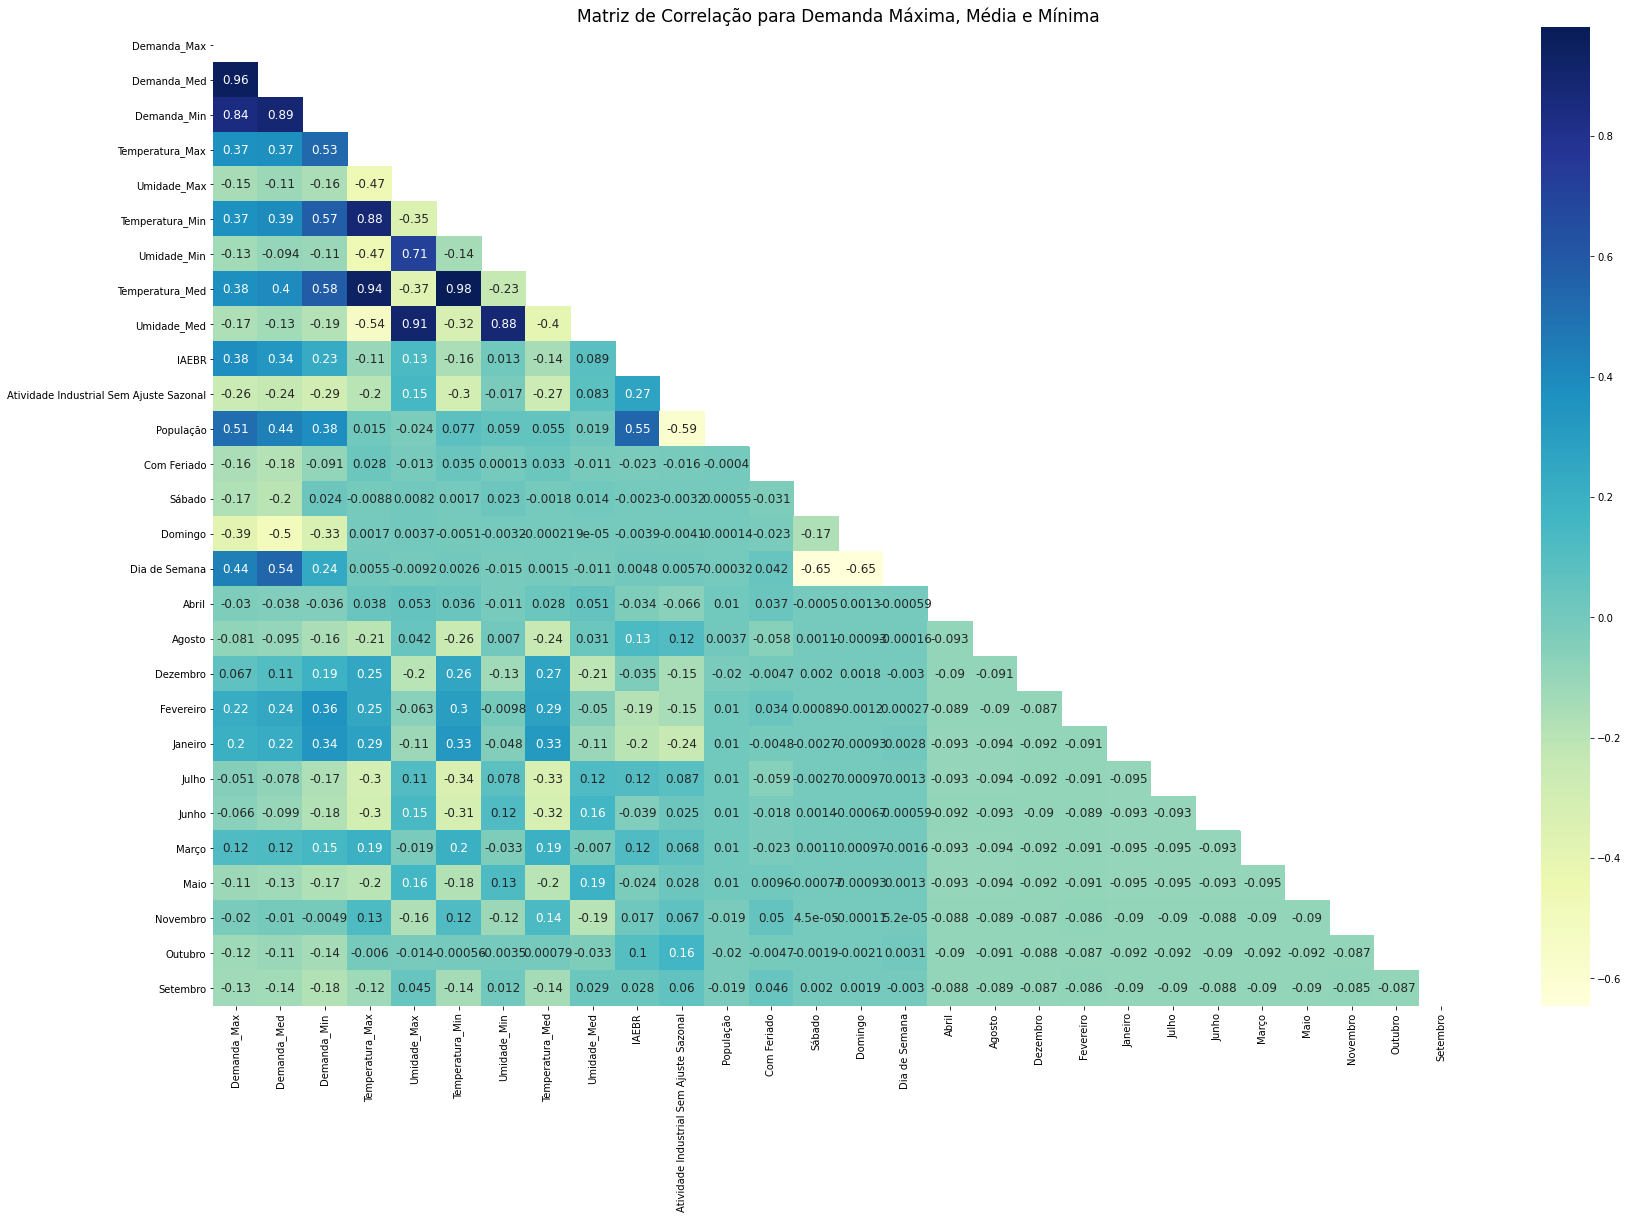

In [53]:
ax = plt.figure(figsize=(28,18));
corr3 = df_cor_3.corr()
mask = np.triu(np.ones_like(corr3, dtype=np.bool))
ax = sns.heatmap(corr3, mask = mask, annot=True, cmap="YlGnBu", annot_kws={"size": 12}, fmt='.2g')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Matriz de Correlação para Demanda Máxima, Média e Mínima', fontsize=17);

***É possível verificar que grande parte das variáveis possui uma correlação significativa com as demandas. Alguns meses possuem baixa correlação, mas serão mantidos porque os outros meses possuem alta correlação.***

### Correlação das features com os dados de demanda média, mínima e máxima do dia (Excluindo os meses, para melhor visualização)

In [54]:
df_cor_4 = df_3[['Demanda_Max', 'Demanda_Med','Demanda_Min','Temperatura_Max', 'Umidade_Max', 'Temperatura_Min', 'Umidade_Min',
       'Temperatura_Med', 'Umidade_Med', 'IAEBR', 'Atividade Industrial Sem Ajuste Sazonal', 'População', 'Com Feriado',
       'Sábado', 'Domingo', 'Dia de Semana']]

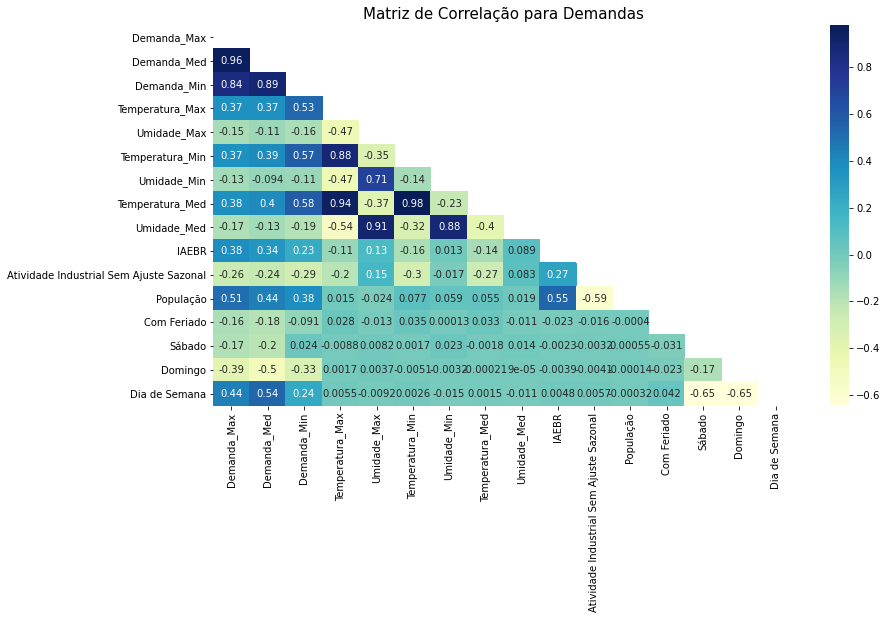

In [55]:
ax = plt.figure(figsize=(13,7));
corr4 = df_cor_4.corr()
mask = np.triu(np.ones_like(corr4, dtype=np.bool))
ax = sns.heatmap(corr4, annot=True, cmap="YlGnBu", annot_kws={"size": 10}, fmt='.2g', mask=mask)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10);
plt.title('Matriz de Correlação para Demandas', fontsize=15);

***Verifica-se que existe uma alta correlação positiva entre dia de semana, as temperaturas, o Índice de Atividade Econômica e a População e os valores de demanda. Ao mesmo tempo, existe alta correlação negativa com o domingo e a demanda, o que é esperado, uma vez que a demanda no domingo é sabidamente mais baixa do que nos dias de semana.***

Criando novo parquet com o dataframe final, apenas com as variáveis que parecem ter capacidade de prever a demanda para fazer a modelagem.

In [56]:
df_3.to_parquet('DadosFinais\df_final.parquet.gzip',
              compression='gzip')  